In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')
sns.set_style('dark')

In [2]:
df= pd.read_csv(r'https://raw.githubusercontent.com/gerberl/6G7V0026-2324/main/datasets/titanic.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
#summarize the statistic for non-categorical variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [7]:
df.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [8]:
#check for null values
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

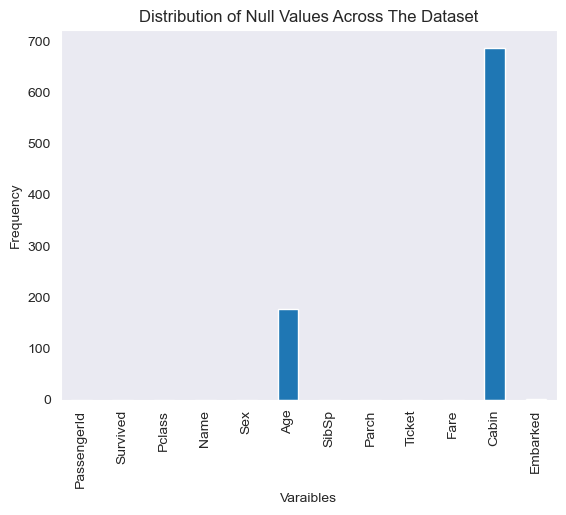

In [9]:
df.isna().sum().plot(kind='bar')
plt.title('Distribution of Null Values Across The Dataset')
plt.ylabel('Frequency')
plt.xlabel('Varaibles')
plt.show()

In [10]:
#check for duplicated values
df.duplicated().sum()

0

## Data Cleaning and Wrangling

In [11]:
#fill null values by mean
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [12]:
#drop cabin dataset as almost more than 70% of it is null
df.drop(['Cabin'], axis=1, inplace=True)

In [13]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [14]:
#reset the index to passengerid
df.set_index('PassengerId', inplace=True)

In [15]:
#capitalize the sex
df['Sex']= df['Sex'].str.capitalize()

In [16]:
df['Embarked'].replace(['S','C','Q'],['Southampton','Cherbourg','Queenstown'], inplace=True)

## Exploratory Data Analysis

### Univariate Variables

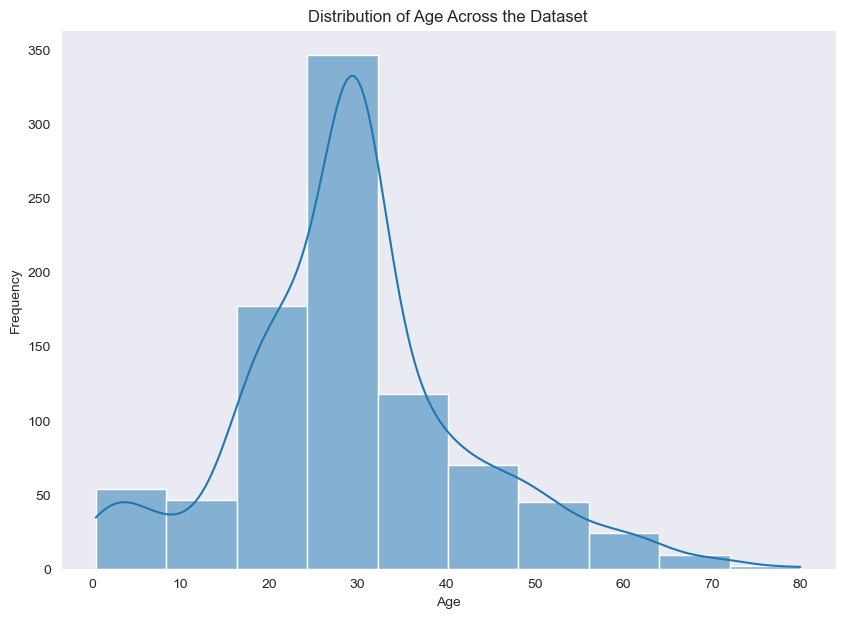

In [17]:
fig, ax=plt.subplots(figsize=(10,7))
sns.histplot(data=df, x='Age', bins=10, kde=True)
plt.ylabel('Frequency')
plt.title('Distribution of Age Across the Dataset')
plt.show()

In [18]:
sex_count = df['Sex'].value_counts()
print(sex_count)

Male      577
Female    314
Name: Sex, dtype: int64


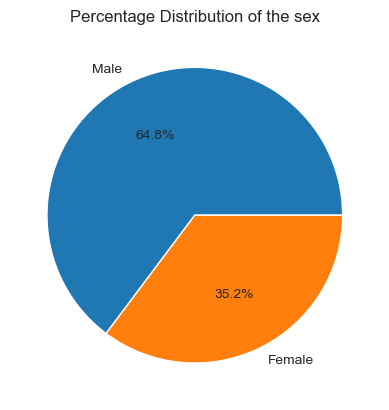

In [19]:
sex_count.plot(kind='pie', autopct='%.1f%%', ylabel='', title='Percentage Distribution of the sex')
plt.show()

### Bivariate Variables

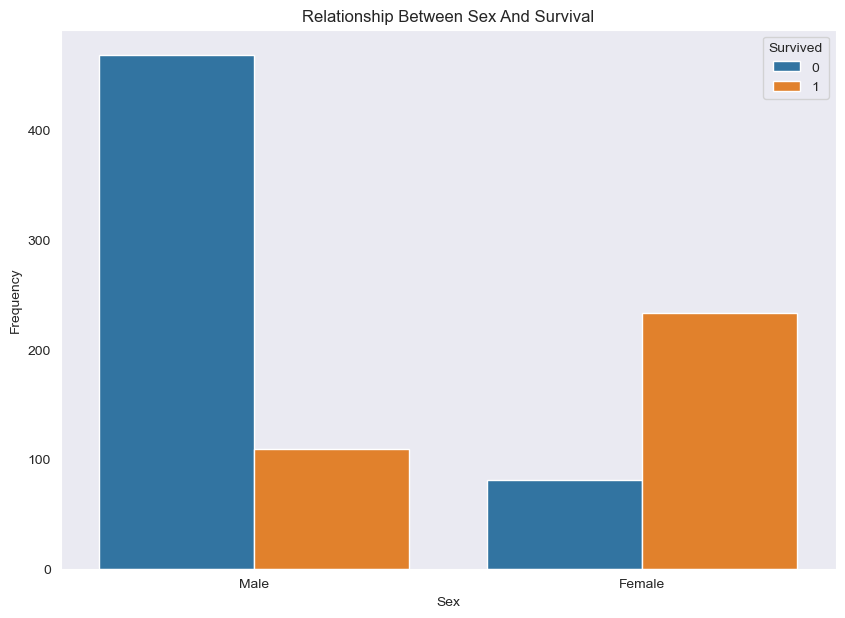

In [20]:
fig, ax = plt.subplots(figsize=(10,7))
sns.countplot(data=df, x='Sex', hue='Survived', )
plt.ylabel('Frequency')
plt.title('Relationship Between Sex And Survival')
plt.show()

Text(0.5, 1.0, 'Relationship Between Embarked Location and Age')

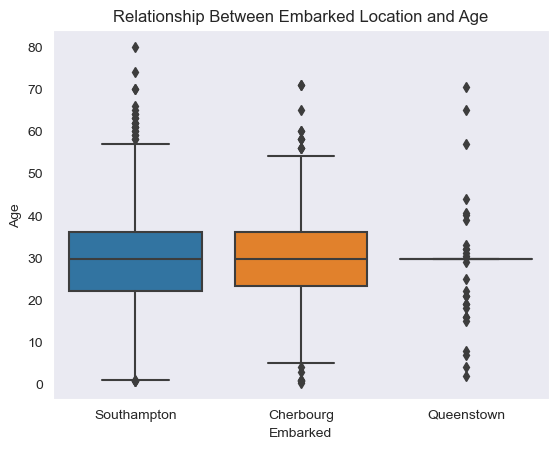

In [21]:
#relationships between embarked and sage
sns.boxplot(data=df, x='Embarked', y='Age')
plt.title('Relationship Between Embarked Location and Age')

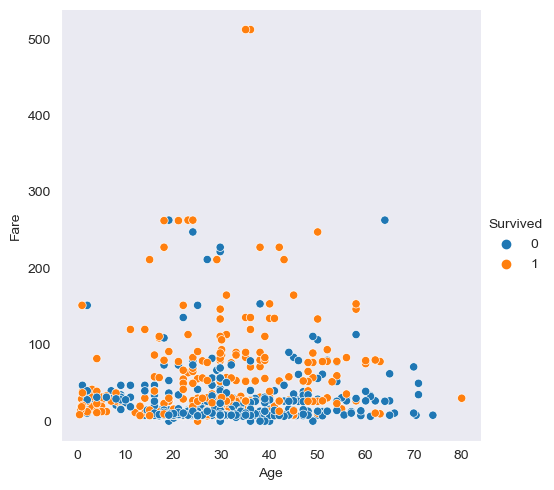

In [22]:
#check the reltionship between fare and and age peoeple who survived
sns.relplot(data=df, x='Age', y='Fare',hue='Survived')